# Performance Analysis of a Marketing Campaign: Metrics and Correlations 📈
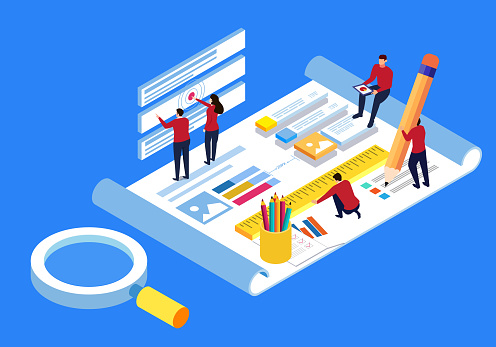

 # Background
XYZ company recently launched a marketing campaign to promote its new product. They used various marketing channels such as email, House Ads, Push, Facebook, and Instagram and created different variants of the campaign to see which one performs the best. The campaign was targeted towards users of different age groups, speaking different languages, and residing in different regions. The company wants to analyze the performance of the campaign using the provided dataset and make data-driven decisions for future campaigns.

# Expectations
To analyze the performance of the marketing campaign, we need to answer the following questions:
1. How many users see the marketing assets daily?
2. What is the conversion rate of the marketing campaign overall?
3. How does the conversion rate differ between marketing channels?
4. Which variant of the campaign performed better in terms of conversion rate?
5. Did the language displayed affect the conversion rate?
6. What is the conversion rate by the language that the marketing asset was shown in?
7. Was there any difference in the conversion rate based on when in the month?
8. How many people did each marketing channel reached by age group?
9. How does age group relate to the conversion rate?
10. How effective is the campaign in converting English speakers?
11. What is the retention rate of the campaign overall?
12. How does the retention rate differ between marketing channels?
13. Which subscribing channel resulted in the highest retention rate?



## Data Dictionary

- user_id: unique identifier for each user
- date_served: date when the user was served the campaign
- marketing_channel: the channel through which the campaign was delivered
- variant: the specific version of the campaign delivered to the user
- converted: indicating whether the user converted after seeing the campaign
- language_displayed: the language in which the campaign was displayed
- language_preferred: the user's preferred language
- age_group: the age group of the user
- date_subscribed: date when the user subscribed to the product
- date_canceled: date when the user canceled their subscription (if applicable)
- subscribing_channel: the channel through which the user subscribed to the product
- is_retained: indicating whether the user is still a customer



# Import Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline


# Import Dataset

In [2]:
# load files
marketing_df = pd.read_csv('/kaggle/input/markeeting-dataset/marketing.csv')
fixed_df = pd.read_csv('/kaggle/input/markeeting-dataset/marketing_new.csv')

# Examine data

In [3]:
marketing_df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [4]:
marketing_df.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [5]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


# Data Cleaning

I observed that columns in the data are in the wrong format


1.  Date Format

In [6]:
#convert all date column to date format
marketing_df['date_served'] = pd.to_datetime(marketing_df['date_served'])
marketing_df['date_subscribed'] = pd.to_datetime(marketing_df['date_subscribed'])
marketing_df['date_canceled'] = pd.to_datetime(marketing_df['date_canceled'])


2. Boolean Format

In [7]:
#convert all columns with true and false to boolean format
marketing_df['converted'] = marketing_df['converted'].astype('bool')
marketing_df['is_retained'] = marketing_df['is_retained'].astype('bool')

In [8]:
#let's take a look at it now
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10037 non-null  bool          
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          10037 non-null  bool          
dtypes: bool(2), datetime64[ns](3), object(7)
memory usage: 803.9+ KB


# Feature Engineering
I will be creating more column that will be of use during analysis

1. Correct language: when the language displayed is the laguage preferred

In [9]:
# create new column 
marketing_df['is_correct_language'] = np.where(marketing_df['language_displayed'] == marketing_df['language_preferred'],'Yes', 'No')


2. Channel code: assign the channels to numbers 

In [10]:
#create collection
campaign_dict = {'House Ads': 1, 'Email': 2, 'Push': 3, 'Facebook': 4, 'Instagram': 5}
marketing_df['channel_code'] = marketing_df['subscribing_channel'].map(campaign_dict)

3. Day of the week: the day the customer subscribe

In [11]:
#create new column
marketing_df['Dow'] = marketing_df['date_subscribed'].dt.dayofweek

# Data Exploration

## **1. How many users see the marketing assets daily?**

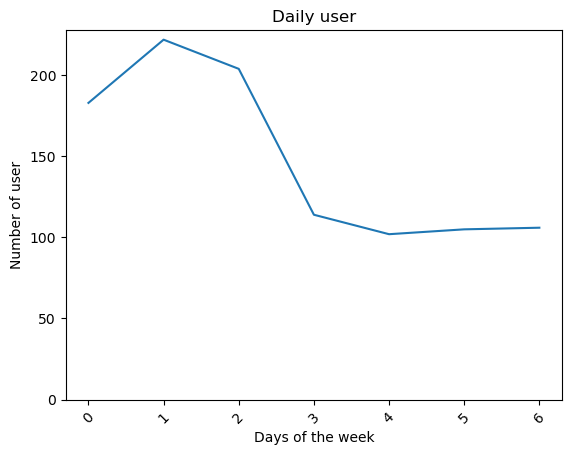

,user_id
Dow,
0.0,183
1.0,222
2.0,204
3.0,114
4.0,102
5.0,105
6.0,106


In [12]:
#count unique user per day
daily_user = marketing_df.groupby('Dow')['user_id'].nunique()
daily_user.plot() #plot a graph
plt.title('Daily user')
plt.ylabel('Number of user')
plt.xlabel('Days of the week')
plt.xticks(rotation = 45)
plt.ylim(0)
plt.show()
pd.DataFrame(daily_user)

We see that more users view the marketing asset at the beginning of the week

## **2. What is the conversion rate of the marketing campaign overall?**

In [13]:
#create new metric - conversion rate
subscriber = marketing_df[marketing_df['converted'] == True]['user_id'].nunique()
total = marketing_df['user_id'].nunique()
convertion_rate = subscriber/ total
print("Conversion Rate: ", round(convertion_rate * 100, 2),'%')

Conversion Rate:  14.09 %


## **3. How does the conversion rate differ between marketing channels?**

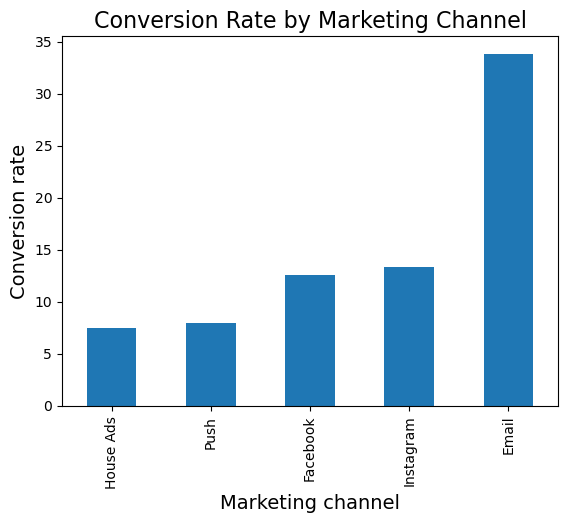

,user_id
marketing_channel,
House Ads,7.51
Push,7.92
Facebook,12.57
Instagram,13.33
Email,33.82


In [14]:
#group conversion by marketing channel
converted_user = marketing_df[marketing_df['converted'] == True].groupby('marketing_channel')['user_id'].nunique()
#total user for each group
total_user = marketing_df.groupby('marketing_channel')['user_id'].nunique()
conversion_rate = round(converted_user / total_user * 100, 2)
#plot a graph for the conversion rate 
conversion_rate.sort_values().plot(kind = 'bar')
plt.title('Conversion Rate by Marketing Channel', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Marketing channel', size = 14)
plt.show()
pd.DataFrame(conversion_rate.sort_values())

* Email has the most conversion rate and next to it is Instagram
* House Ads have the least conversion rate of all the marketing channels

## **4. Which variant of the campaign performed better in terms of conversion rate?**

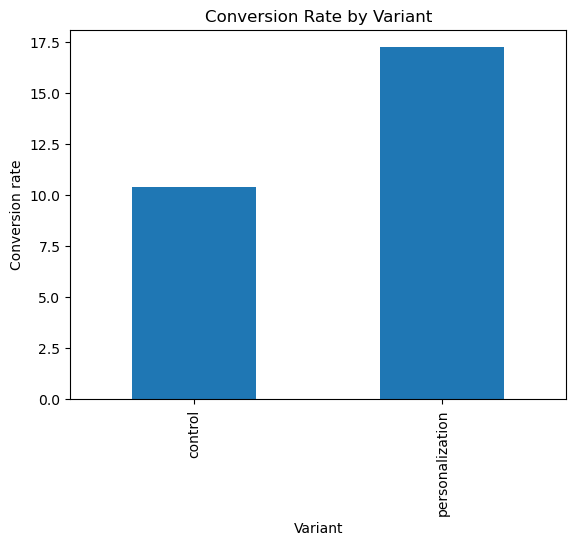

,0
variant,
control,10.38
personalization,17.24


In [15]:
#group conversion by variant
converted_user = marketing_df.groupby('variant')['converted'].sum()
#total user for each group
total_user = marketing_df.groupby('variant')['user_id'].nunique()
conversion_rate = round(converted_user / total_user * 100, 2)
#plot a graph for the conversion rate 
conversion_rate.sort_values().plot(kind = 'bar')
plt.title('Conversion Rate by Variant')
plt.ylabel('Conversion rate')
plt.xlabel('Variant')
plt.show()
pd.DataFrame(conversion_rate)

Personalized variant performed better with almost twice the conversion rate of the control variant

## **5. Did the language displayed affect the conversion rate?**

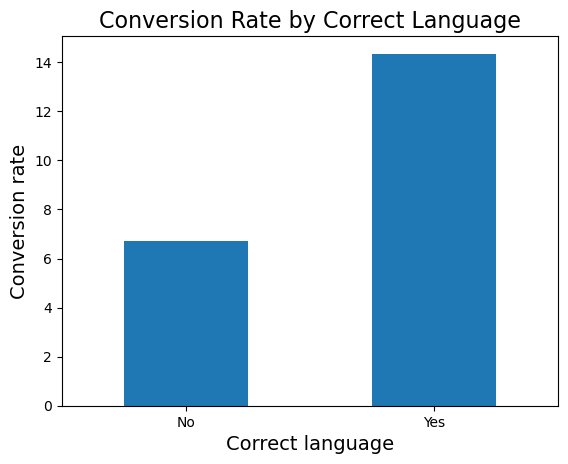

,user_id
is_correct_language,
No,6.70
Yes,14.35


In [16]:
#group conversion by correct language

converted_user = marketing_df[marketing_df['converted'] == True].groupby('is_correct_language')['user_id'].nunique()
#total user for each group
total_user = marketing_df.groupby('is_correct_language')['user_id'].nunique()
conversion_rate = round(converted_user / total_user * 100, 2)
#plot a graph for the conversion rate 
conversion_rate.sort_values().plot(kind = 'bar')
plt.title('Conversion Rate by Correct Language', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Correct language', size = 14)
plt.xticks(rotation = 360)
plt.show()
pd.DataFrame(conversion_rate)

Yes, the language displayed affected the conversion rate as campagains with correct language has higher conversion rate than the ones with wrong language

## **6. What is the conversion rate by the language that the marketing asset was shown in?**

In [17]:
# total user for each language
total = marketing_df.groupby('language_displayed')['user_id'].nunique()
# converted for each language
subscriber = marketing_df[marketing_df['converted'] == True].groupby('language_displayed')\
              ['user_id'].nunique()
lanuage_conver = round(subscriber/total * 100, 2)
pd.DataFrame(lanuage_conver.sort_values())

,user_id
language_displayed,
English,13.13
Spanish,20.00
Arabic,50.00
German,71.62


## **7. Was there any difference in the conversion rate based on when in the month?**

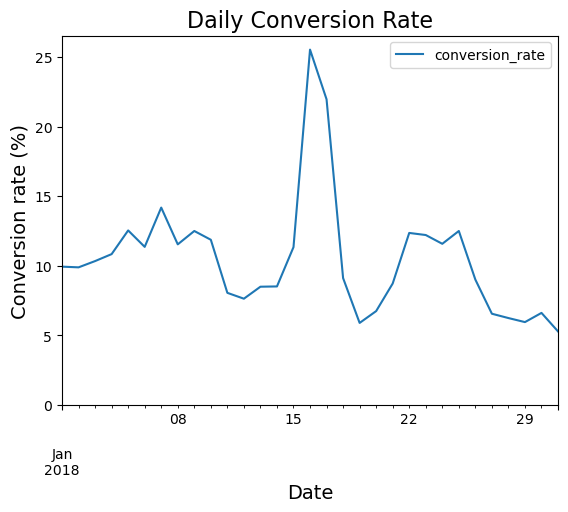

In [18]:
total = marketing_df.groupby('date_served')['user_id'].nunique()
subscriber = marketing_df[marketing_df['converted'] == True]\
               .groupby('date_served')['user_id'].nunique()
daily_conversion_rate = round(subscriber/ total * 100, 2)
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index())
daily_conversion_rate.columns = ['date_served', 'conversion_rate']
daily_conversion_rate.plot('date_served', 'conversion_rate')
plt.title('Daily Conversion Rate', size = 16)
plt.xlabel('Date', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)
plt.ylim(0)

plt.show()

there was a spike in the conversion rate in the middle of the month followed by a sharp decrease


## **8. How many people did each marketing channel reached by age group?**

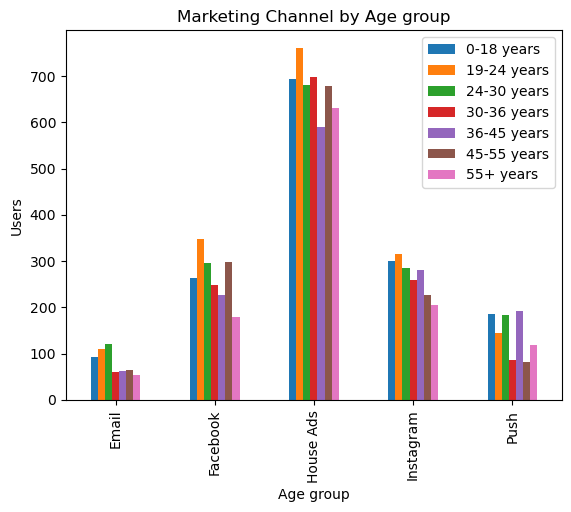

In [19]:
channel_age = marketing_df.groupby(['marketing_channel', 'age_group'])\
                            ['user_id'].count()
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))
channel_age_df.plot(kind = 'bar')
plt.title('Marketing Channel by Age group')
plt.xlabel('Age group')
plt.ylabel('Users')
plt.legend(loc = 'upper right',
           labels = channel_age_df.columns.values)
plt.show()

The shows that Email is not reaching older people and Facebook is not reaching people under 18 

In [20]:
#building an automated conversion rate function
def conversion_rate(dataframe, column_names):
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    conversion_rate = column_conv / column_total
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

## **9. How does age group relate to the conversion rate?**


In [21]:
#using the conversion rate function
age_group_conver = conversion_rate(marketing_df, ['date_served','age_group'])
age_group_conver = pd.DataFrame(age_group_conver.unstack(level = 1))
age_group_conver

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,0.155172,0.196721,0.105263,0.040816,0.042553,0.022222,0.086957
2018-01-02,0.180328,0.164384,0.114754,0.040000,0.043478,0.043478,0.024390
2018-01-03,0.102041,0.208955,0.150943,0.042553,0.060000,0.047619,0.043478
2018-01-04,0.117647,0.200000,0.183673,0.045455,0.043478,0.061224,0.073171
2018-01-05,0.142857,0.250000,0.136364,0.090909,0.068182,0.046512,0.088889
2018-01-06,0.120000,0.188679,0.145833,0.078947,0.073171,0.068182,0.078947
2018-01-07,0.128205,0.220000,0.153846,0.100000,0.111111,0.128205,0.117647
2018-01-08,0.142857,0.196078,0.140000,0.069767,0.069767,0.051282,0.102564
2018-01-09,0.148936,0.200000,0.152174,0.090909,0.093023,0.068182,0.102564


In [22]:
# automating a plotting function
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation = 90)
        # Show plot
        plt.show()  
        plt.clf()

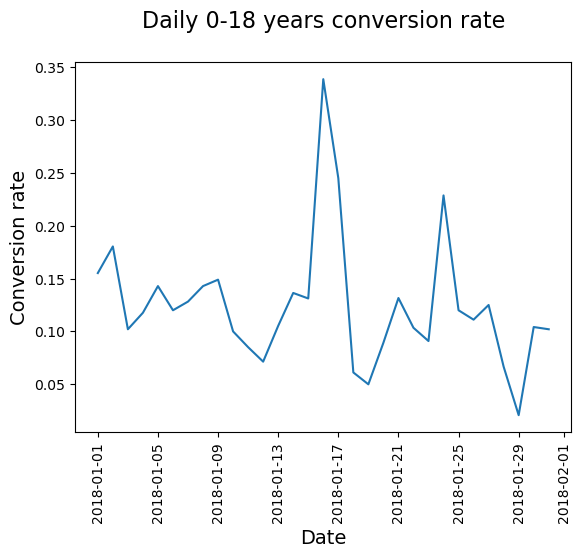

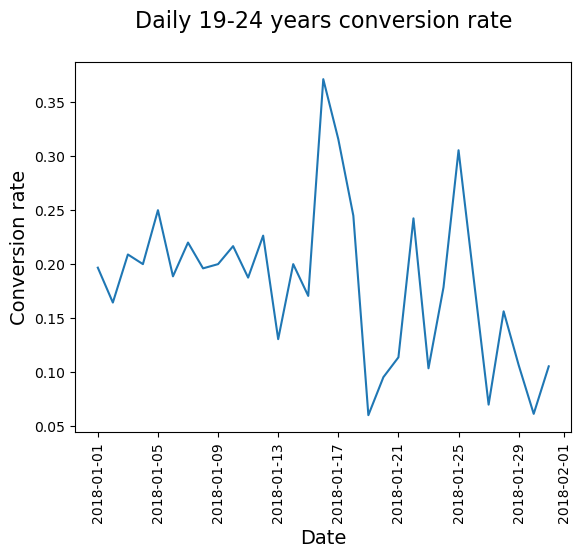

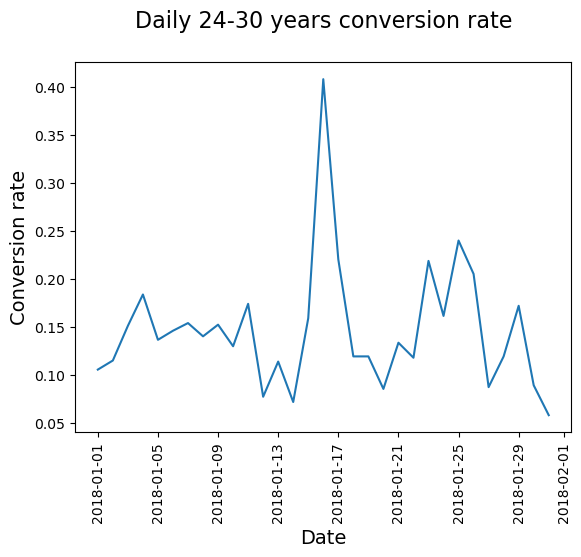

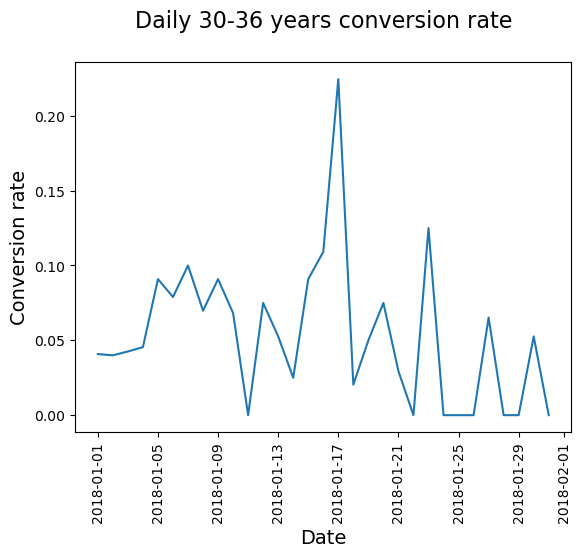

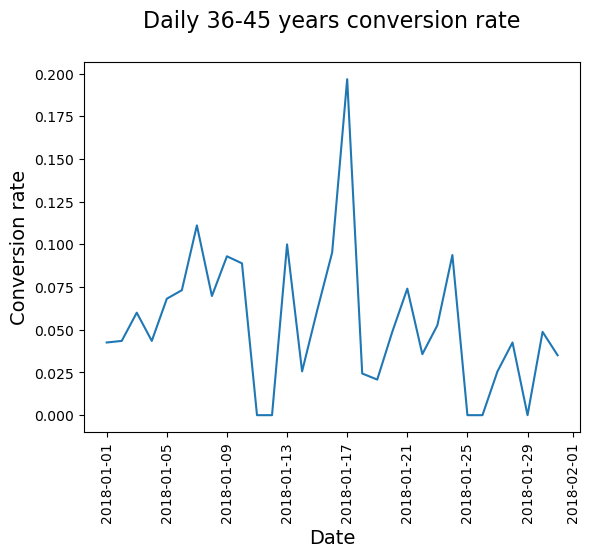

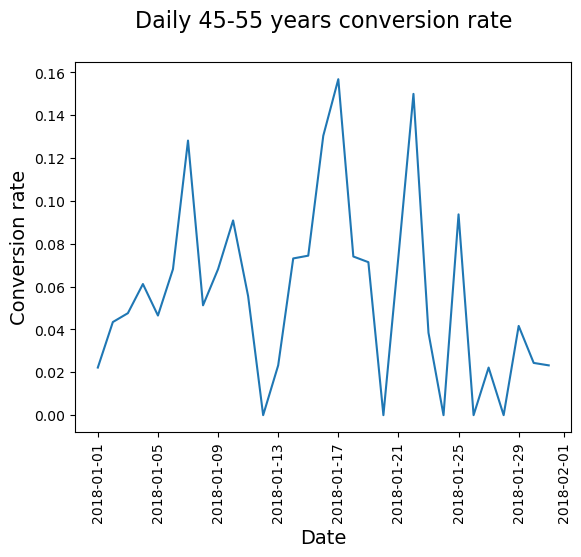

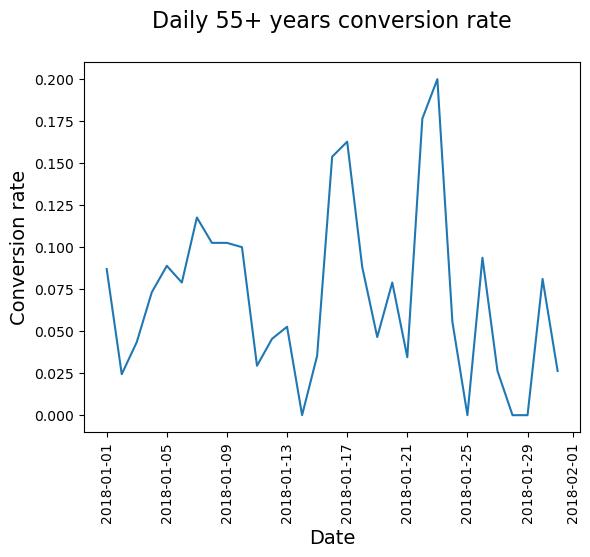

<Figure size 640x480 with 0 Axes>

In [23]:
#ploting the age group conversion
plotting_conv(age_group_conver)

* The daily conversion rate of users in age groups 0-18 and 24-30 is generally low
* age group 19-24 have mostly high daily conversion rate

## **10. How effective is the campaign in converting English speakers.**

In [24]:
#isolate english speakers
english_speakers = marketing_df[marketing_df['language_displayed'] == 'English']
#the total number of English speakers
total = english_speakers['user_id'].nunique()
#the converted english speakers
converted = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()
print("English speakers conversion rate: ", round((converted/ total) * 100, 2), "%")


English speakers conversion rate:  13.13 %


## **11. What is the retention rate of the campaign overall?**

In [25]:
#create another metric - retention rate
retained = marketing_df[marketing_df['is_retained'] == True]['user_id'].nunique()
total_subscriber = marketing_df[marketing_df['converted'] == True]['user_id'].nunique()

retention  = total_subscriber / retained 
print("Retention Rate: ", round(retention * 100, 2), '%')


Retention Rate:  14.78 %


In [26]:
#creating an automated retention rate function
def retention_rate(dataframe, column_name):
    column_total = dataframe.groupby(column_name)['user_id'].nunique()
    column_reten = dataframe[dataframe['is_retained'] == True].groupby(column_name)['user_id'].nunique()
    retention_rate = column_reten / column_total
    retention_rate = retention_rate.fillna(0)
    return retention_rate

## **12. How does the retention rate differ between marketing channels?**


In [27]:
#using retention rate function
marketing_reten_rate = retention_rate(marketing_df, 'marketing_channel')
marketing_reten_rate_df = pd.DataFrame(marketing_reten_rate)
marketing_reten_rate_df.sort_values('user_id')

,user_id
marketing_channel,
Email,0.907776
Instagram,0.947126
House Ads,0.947833
Facebook,0.948237
Push,0.963992


All the marketing channels have high retention rate and the highest being the push channel

## **13. Which subscribing channel has the highest rentention rate** 

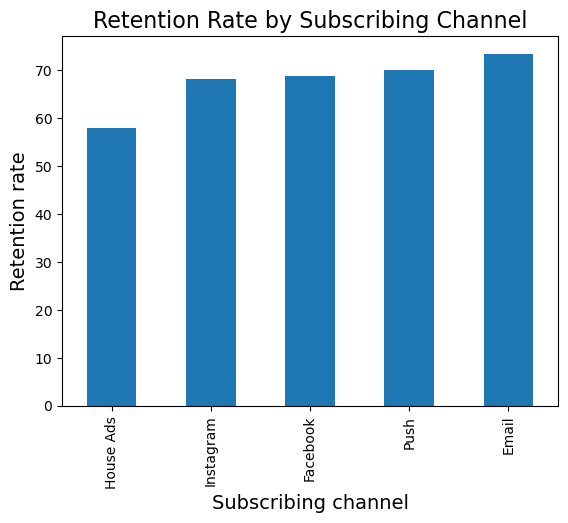

,user_id
subscribing_channel,
House Ads,58.05
Instagram,68.10
Facebook,68.78
Push,70.13
Email,73.44


In [28]:
#group retention by marketing channel
retained_user = marketing_df[marketing_df['is_retained'] == True].groupby('subscribing_channel')['user_id'].nunique()
#total user for each group
total_user = marketing_df.groupby('subscribing_channel')['user_id'].nunique()
retention_rate = round(retained_user / total_user * 100, 2)
#plot a graph for the conversion rate 
retention_rate.sort_values().plot(kind = 'bar')
plt.title('Retention Rate by Subscribing Channel', size = 16)
plt.ylabel('Retention rate', size = 14)
plt.xlabel('Subscribing channel', size = 14)
plt.show()
pd.DataFrame(retention_rate.sort_values())

Email has the highest retention rate of all subscribing channel

# **Further analysis**

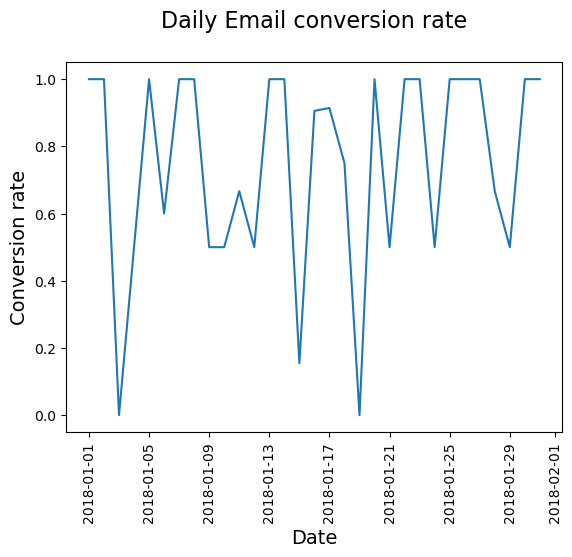

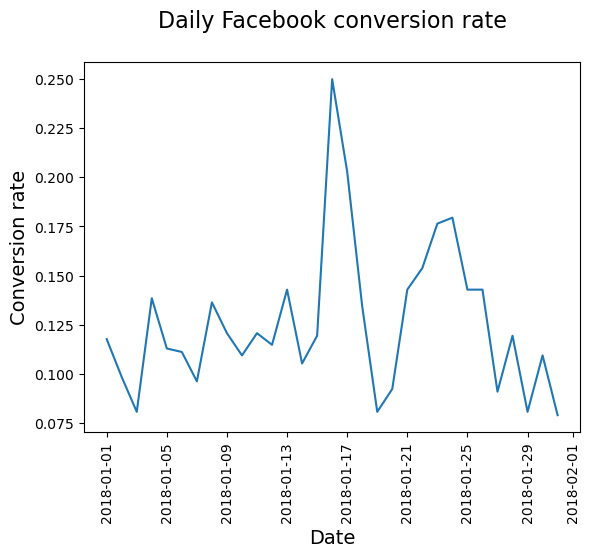

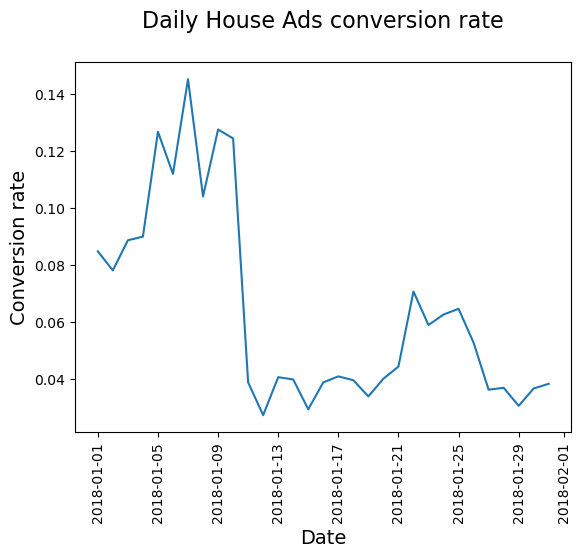

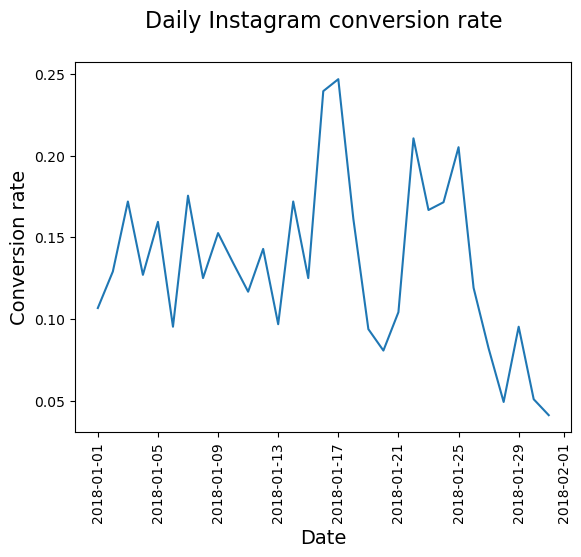

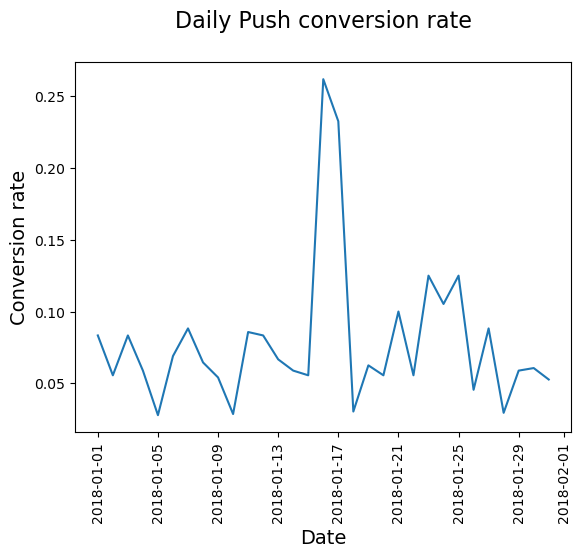

<Figure size 640x480 with 0 Axes>

In [29]:
daily_conv_chann = conversion_rate(marketing_df, ['date_served', 'marketing_channel'])
daily_conv_chann = pd.DataFrame(daily_conv_chann.unstack(level = 1))
# plot 
plotting_conv(daily_conv_chann)

House Ads shows a sudden decline in conversion rate from 11th of Feb, further anaysis will be done to figure out why

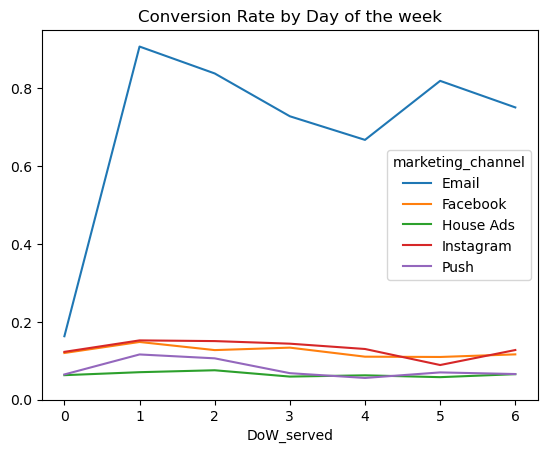

In [30]:
#checking the conversion rate by day of the week if the issue is from 
#create another column Dow served
marketing_df['DoW_served'] = marketing_df['date_served'].dt.dayofweek
#check out the conversion rate of each channel for the day of the week
dow_conv = conversion_rate(marketing_df, ['DoW_served', 'marketing_channel'])
dow_conv = pd.DataFrame(dow_conv.unstack(level = 1))
#plot
dow_conv.plot()
plt.title('Conversion Rate by Day of the week')
plt.ylim(0)
plt.show()

House Ads show a natural fluctation of conversion rate through the week so the day of the week is not the cause of the earlier observation


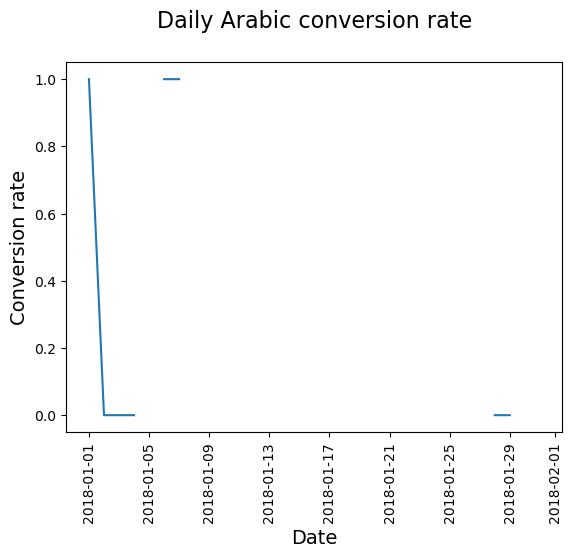

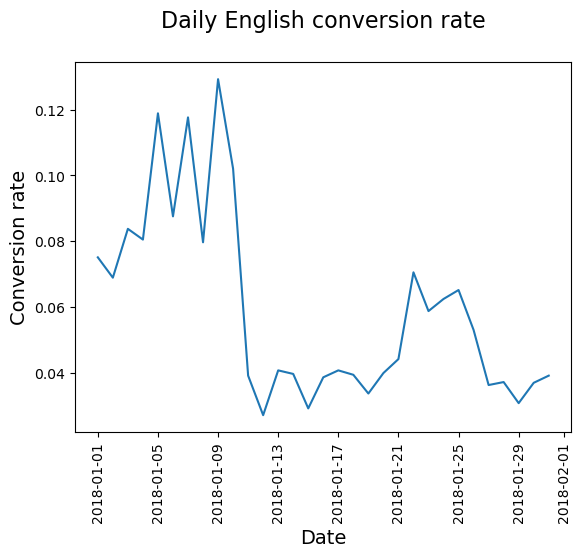

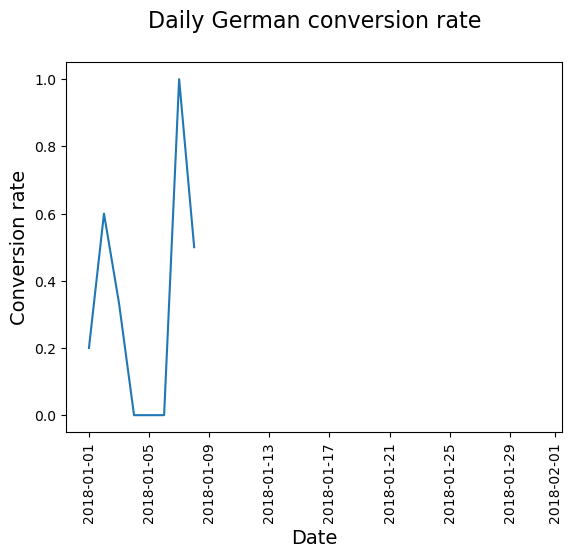

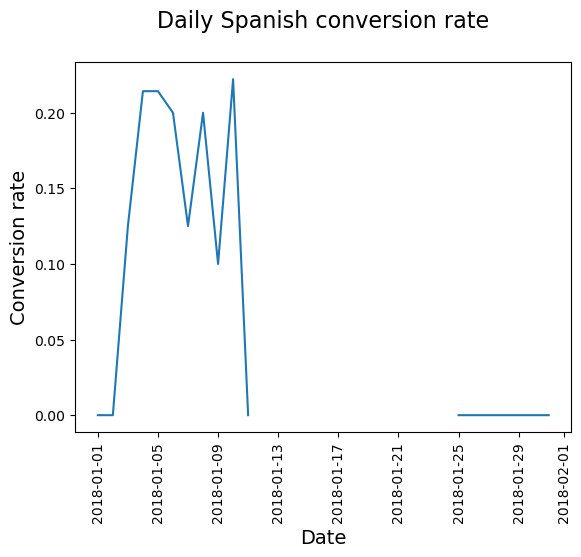

<Figure size 640x480 with 0 Axes>

In [31]:
#checking the conversion rate by day of the week if the issue is from

house_ads = marketing_df[marketing_df['marketing_channel'] == 'House Ads']
conv_lang_chan = conversion_rate(house_ads, ['date_served','language_displayed'])
conv_lang_df = pd.DataFrame(conv_lang_chan.unstack(level = 1))
plotting_conv(conv_lang_df)

Ads shown in English shows and obvious drop in conversion rate while there do not appear to be any ads on the other languagues so the issue to arise from the language displayed. We'll analysis further to find out how

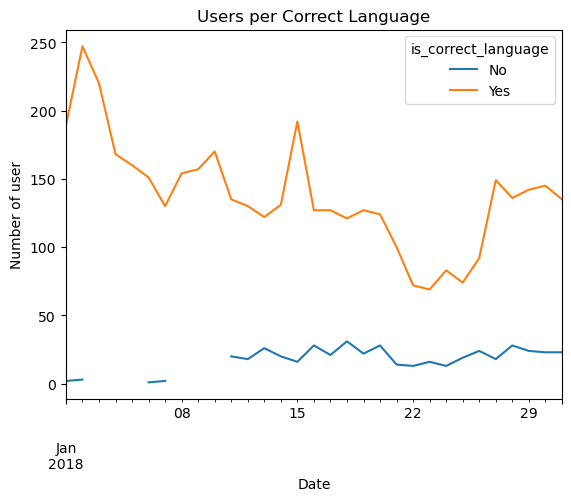

In [32]:
#we'll be using the is_correct_language for the house_ads channel to better understand why 
lang_check = house_ads.groupby(['date_served', 'is_correct_language'])['user_id'].count()
lang_check_df = pd.DataFrame(lang_check.unstack(level = 1))
lang_check_df.plot()
plt.ylabel("Number of user")
plt.xlabel('Date')
plt.title('Users per Correct Language')
plt.show()

We notice an increase in No (i.e ads not shown in the preferred language).
<p> This tells us that the reason for the sudden decrease in conversion rate in House Ad marketing channel is due to the ad not being shown in the correct language <p/>

# **A/B Testing on Email marketing channel**

#### We will be using conversion rate as the key metric for this test

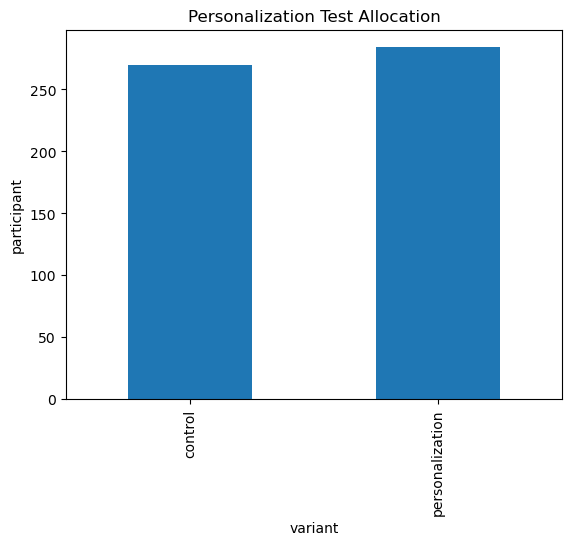

In [33]:
#subset the dataframe for email
email = marketing_df[marketing_df['marketing_channel'] == 'Email']
# find the number of users allocated to each variant
alloc = email.groupby('variant')['user_id'].nunique()
#plot the result
alloc.plot(kind = 'bar')
plt.title('Personalization Test Allocation')
plt.ylabel('participant')
plt.show()

this shows that the number of participant are similar but not equal which is acceptable

In [34]:
#calculate the conversion rate of each variant for email
sub = email.groupby(['user_id', 'variant'])['converted'].max()
sub_df = pd.DataFrame(sub.unstack(level = 1))
control = sub_df['control'].dropna()
personal = sub_df['personalization'].dropna()
print('Control conversion rate: ', np.mean(control))
print('Personalization conversion rate: ', np.mean(personal))

Control conversion rate:  0.2814814814814815
Personalization conversion rate:  0.3908450704225352


This shows that personalization variant has a higher conversion rate

#### Next we calculate the performance difference of the control (i.e the lift) and check if there is a statistical significants between the test

In [35]:
#calculate limit by creating a lift function
def lift(a, b):
    a_mean = np.mean(a) 
    b_mean = np.mean(b)
    lift = (b_mean - a_mean) / a_mean
    return str(round(lift * 100, 2)) + '%'

print('lift: ', lift(control, personal)  )

lift:  38.85%


This shows that the personalization variant performed well

Next we check if there is statstical significance between the test

In [36]:
from scipy.stats import ttest_ind
t = ttest_ind(control, personal)
t

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)

#### Next, We will be checking how the A/B testing is affect different demographics


In [37]:
#Build an A/B test segmentation function
def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(marketing_df[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment
      email = marketing_df[(marketing_df['marketing_channel'] == 'Email') & (marketing_df[segment] == subsegment)]

      subs = email.groupby(['user_id', 'variant'])['converted'].max()
      subs = pd.DataFrame(subs.unstack(level=1)) 
      control = subs['control'].dropna()
      personal = subs['personalization'].dropna()

      print('lift:', lift(control, personal)) 
      print('t-statistic:', ttest_ind (control, personal), '\n\n')

In [38]:
# check out the A/B test in language displayed
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




This shows that English and Spanish are languages that exhibit statistical significance in the A/B testing

In [39]:
# check out the A/B test in age group
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 




This shows that personalization variant has a better performance to younger people than older people

# Conclusion

* The campaign was viewed more at the beginning of the week.
* The overall conversion rate of the campaign was 14.09%.
* Email was the most effective marketing channel, followed by Instagram.
* House Ads had the lowest conversion rate of all the marketing channels.
* The personalized variant of the campaign performed better than the control variant.
* The language displayed affected the conversion rate, and campaigns with the correct language had higher conversion rates than those with the wrong language.
* There was a spike in the conversion rate in the middle of the month, followed by a sharp decrease.
* Email was not reaching older people, and Facebook was not reaching people under 18.
* The daily conversion rate of users in age groups 0-18 and 24-30 was generally low, while the age group 19-24 had mostly high daily conversion rates.
* The conversion rate of English speakers was 13.13%.
* All the marketing channels had high retention rates, and the highest was for the push channel.
* Email had the highest retention rate of all subscribing channels.
* House Ads showed a sudden decline in the conversion rate from the 11th of Feb, which was due to the ad not being shown in the correct language.
* Ads shown in English showed an obvious drop in the conversion rate.
*  personalization variant has a higher conversion rate.
*  English and Spanish are languages that exhibit statistical significance in the A/B testing.
*  personalization variant has a better performance to younger people than older people


# Recommendation
* Schedule campaigns to start at the beginning of the week to take advantage of higher viewership.
* Focus on email and Instagram as the most effective marketing channels, and consider reducing or eliminating House Ads due to their low conversion rate.
* Use the personalized variant of the campaign, which showed a significant lift of 38.85% compared to the control variant.
* Ensure campaigns are displayed in the correct language, as this can affect the conversion rate. Ads in Arabic and Spanish showed a high lift, while ads in English showed a drop in conversion rate.
* Consider targeting age groups 19-24 and 24-30, which had high daily conversion rates, while being aware that age group 0-18 and 30-36 had generally low daily conversion rates.
* Be mindful of the retention rate for each channel, and prioritize push notifications and email subscriptions.
* Tailor campaigns to reach older people on email, and people under 18 on Facebook.
* Monitor House Ads closely to ensure that they are being shown in the correct language, as an incorrect display can lead to sudden drops in conversion rates.
* Further optimize campaigns for English speakers, as their conversion rate was slightly lower than the overall average.